In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
url='http://bit.ly/drinksbycountry'

In [5]:
pd.read_table(url)

,"country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent"
0,"Afghanistan,0,0,0,0.0,Asia"
1,"Albania,89,132,54,4.9,Europe"
2,"Algeria,25,0,14,0.7,Africa"
3,"Andorra,245,138,312,12.4,Europe"
4,"Angola,217,57,45,5.9,Africa"
...,...
188,"Venezuela,333,100,3,7.7,South America"
189,"Vietnam,111,2,1,2.0,Asia"
190,"Yemen,6,0,0,0.1,Asia"
191,"Zambia,32,19,4,2.5,Africa"


In [9]:
pd.read_table(url,sep=',')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [10]:
data=pd.read_csv('beer-servings.csv')

In [11]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [12]:
data=pd.read_csv('beer-servings.csv',index_col='Unnamed: 0')

In [13]:
data.shape

(193, 6)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [15]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [ ]:
#filling missing values

In [16]:
data.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

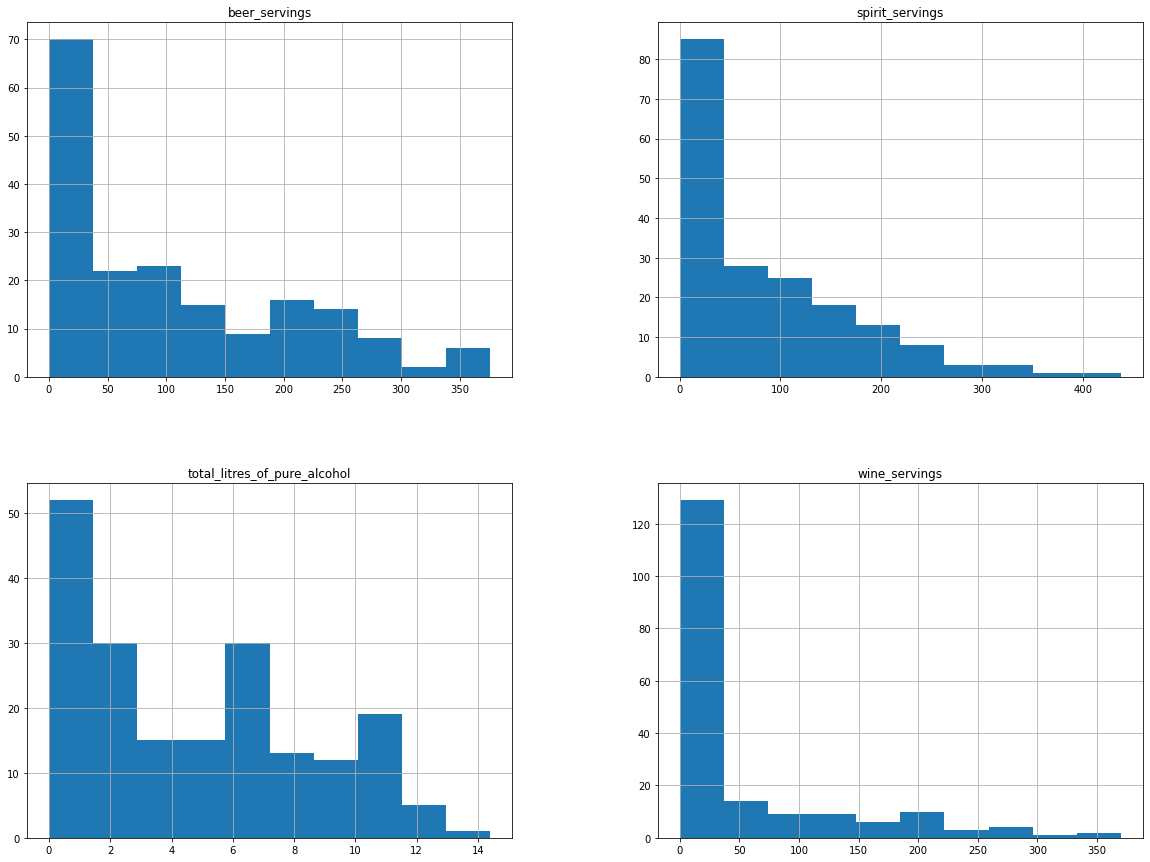

In [19]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show

In [20]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [21]:
data['beer_servings']=data['beer_servings'].fillna(data['beer_servings'].median())

In [22]:
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [23]:
for i in ['spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']:
    data[i]=data[i].fillna(data[i].median())
    

In [24]:
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [25]:
data.groupby('continent')['beer_servings'].mean()

continent
Africa            61.471698
Asia              40.613636
Europe           190.822222
North America    145.434783
Oceania           89.687500
South America    137.000000
Name: beer_servings, dtype: float64

In [26]:
data.country.nunique()

193

In [27]:
data.drop('country',axis=1,inplace=True)

In [28]:
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.0,0.0,Asia
1,89.0,132.0,54.0,4.9,Europe
2,25.0,0.0,14.0,0.7,Africa
3,245.0,138.0,312.0,12.4,Europe
4,217.0,57.0,45.0,5.9,Africa


Text(0.5, 1.0, 'Box plot of beer servings')

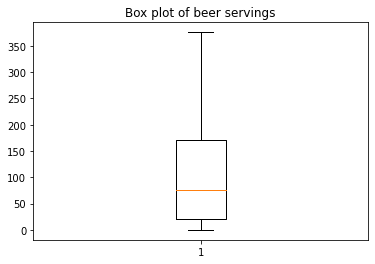

In [30]:
plt.boxplot(data['beer_servings'])
plt.title('Box plot of beer servings')

Text(0.5, 1.0, 'Box plot of spirit_servings')

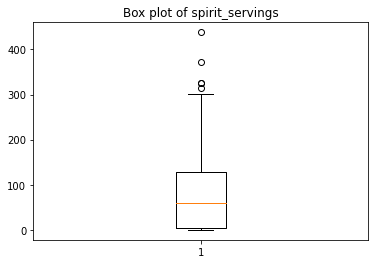

In [31]:
plt.boxplot(data['spirit_servings'])
plt.title('Box plot of spirit_servings')

In [33]:
Q1=np.percentile(data['spirit_servings'],25,interpolation='midpoint')
Q2=np.percentile(data['spirit_servings'],50,interpolation='midpoint')
Q3=np.percentile(data['spirit_servings'],75,interpolation='midpoint')



In [34]:
print(Q1)
print(Q2)
print(Q3)

5.0
60.0
128.0


In [35]:
data['spirit_servings'].median()

60.0

In [36]:
IQR=Q3-Q1

In [37]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [38]:
print(low_lim)
print(up_lim)

-179.5
312.5


In [40]:
outlier=[]
for x in data['spirit_servings']:
    if(x>up_lim) or (x<low_lim):
        outlier.append(x)

In [41]:
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [42]:
ind1=data['spirit_servings']>up_lim
data.loc[ind1].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [43]:
data.drop([15, 68, 73, 141, 144],inplace=True)

Text(0.5, 1.0, 'Box plot of spirit_servings')

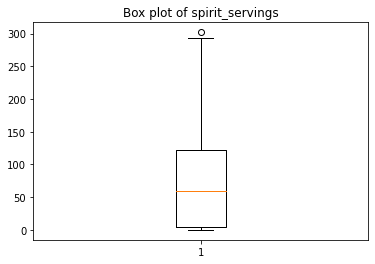

In [44]:
plt.boxplot(data['spirit_servings'])
plt.title('Box plot of spirit_servings')

Text(0.5, 1.0, 'Box plot of wine_servings')

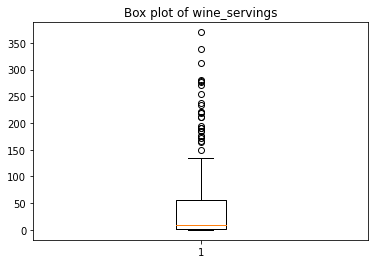

In [45]:
plt.boxplot(data['wine_servings'])
plt.title('Box plot of wine_servings')

In [50]:
Q1=np.percentile(data['wine_servings'],25,interpolation='midpoint')
Q2=np.percentile(data['wine_servings'],50,interpolation='midpoint')
Q3=np.percentile(data['wine_servings'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [52]:
outlier=[]
for x in data['wine_servings']:
    if(x>up_lim) or (x<low_lim):
        outlier.append(x)

In [53]:
outlier

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [54]:
ind1=data['wine_servings']>up_lim
data.loc[ind1].index

Int64Index([  3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,
             75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],
           dtype='int64')

In [55]:
data.drop([  3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,
             75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],inplace=True)

Text(0.5, 1.0, 'Boxplot of wine savings')

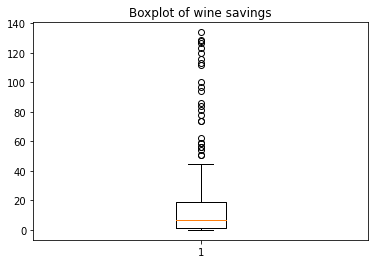

In [56]:
plt.boxplot(data['wine_servings'])
plt.title('Boxplot of wine savings')

Text(0.5, 1.0, 'Boxplot of total_litres_of_pure_alcohol')

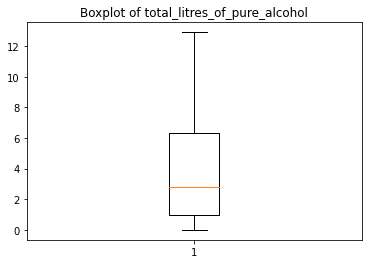

In [58]:
plt.boxplot(data['total_litres_of_pure_alcohol'])
plt.title('Boxplot of total_litres_of_pure_alcohol')

In [59]:
data.shape

(162, 5)